Types of Naive Bayes

Now let's discuss different types of Naive Bayes algorithm and which is used when. So, we have three types

v Gaussian Naive Bayes
This type of Naive Bayes is used when variables are continuous in nature. It assumes that all the variables have a normal distribution. So if you have some variables which do not have this property, you might want to transform them to the features having distribution normal.
The normal distribution has several key features alid properties that define it.

First, its mean (average), median (midpoint), and mode (most frequent observation) are all equal to one another

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
In a normal distribution the mean is zero and the standard deviation is 1.

All kinds of variables in natural and social sciences are normally or approximately normally distributed. Height, birth weight, reading ability, job satisfaction, or SAT scores are just a few examples of such variables

Multinomial Naive Bayes
Suppose you have a text document and you extract all the unique words and create multiple features where each feature represents the count of the word in the document. In such a case, whave a frequency as a feature. In such a scenario, we use multinomial Naive Bayes.

Bernoulli Naive Bayes
This is used when features are binary. So, instead of using the frequency of the word, if you have discrete features in 1s and Os that represent the presence or absence of a feature. In that case, the features will be binary and we will use Bernoulli Naive Bayes.



In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/Copy of diabetes (1) (2) (1) (1).csv')

In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
corr_matrix = data.corr()['Outcome']

corr_matrix

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [7]:
data.shape

(768, 9)

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(768, 9)

In [10]:
x = data.iloc[:,0:8]
y = data['Outcome']


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 2)

In [12]:
y_train.value_counts()

0    391
1    223
Name: Outcome, dtype: int64

In [13]:
#model with implementaion of SMOTE
#SMOTE - for data balancing -synthetic minority over-sampling Technique

from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [14]:
x_res,y_res = sm.fit_resample(x_train,y_train)

In [15]:
y_res.value_counts()

0    391
1    391
Name: Outcome, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_test = sd.fit_transform(x_test)
x_train = sd.fit_transform(x_train)
xres = sd.fit_transform(x_res)

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [18]:
from sklearn.metrics import accuracy_score , confusion_matrix

score = accuracy_score(y_test,y_pred)

score

0.7272727272727273

In [19]:
conf_metc = confusion_matrix(y_test,y_pred)

conf_metc

array([[87, 22],
       [20, 25]])

In [20]:
from sklearn.metrics import mean_squared_error , precision_score , recall_score

msc = mean_squared_error(y_test,y_pred)
print('MSC :', msc)

MSC : 0.2727272727272727


In [21]:
precision = precision_score(y_test,y_pred, average='binary')

print('precision: %3f'% precision)

precision: 0.531915


In [22]:
recall = recall_score(y_test,y_pred, average='binary')

print('recallscore: %3f'% recall)

recallscore: 0.555556


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
labels = ['yes','No']
cm = confusion_matrix(y_test,y_pred)

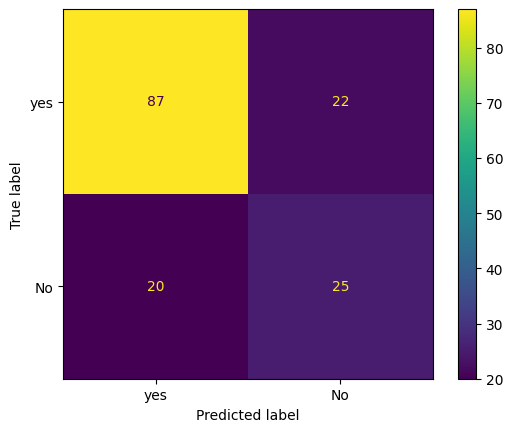

In [25]:
cmd = ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [26]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.6688311688311688

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

ValueError: Negative values in data passed to MultinomialNB (input X)